\begin{align*}
 \mathbf{x}^T \mathbf{A} \mathbf{x} &+ \mathbf{b}^T \mathbf{x} = c \\ 
 &\Downarrow \\ 
 \left | \mathbf{A} -\lambda \mathbf{I} \right | = 0 \;\; &\rightarrow \;\; \lambda_i, \;i=1,2,3\\ 
 \lambda_i \;\; &\rightarrow \;\; \mathbf{k}_i, \;i=1,2,3,  \;\;\text{normalized eigenvectors} \\ 
 &\Downarrow \\
 \mathbf{P} &= \begin{pmatrix} \mathbf{k}_1 & \mathbf{k}_2 & \mathbf{k}_3 \end{pmatrix} \\
 &\Downarrow \\
 \mathbf{x} = \mathbf{P}\mathbf{y} \;\; &\rightarrow \;\; \mathbf{y}^T \mathbf{P}^T \mathbf{A} \mathbf{P} \mathbf{y} + 
   \mathbf{b}^T \mathbf{P} \mathbf{y} = c \\
 &\Downarrow \\
  \lambda_1 \left( y_1^2 + \frac{\mathbf{b}^T \mathbf{k}_1}{\lambda_1} y_1 \right)
  +\lambda_2 \left( y_2^2 + \frac{\mathbf{b}^T \mathbf{k}_2}{\lambda_2} y_2 \right)
  &+\lambda_3 \left( y_3^2 + \frac{\mathbf{b}^T \mathbf{k}_3}{\lambda_3} y_3 \right) = c \\
 &\Downarrow \\
 \frac{\left( y_1 +  \frac{\mathbf{b}^T\mathbf{k}_1}{2\lambda_1} \right)^2}{\frac{1}{\lambda_1}}  
 +\frac{\left( y_2 + \frac{\mathbf{b}^T \mathbf{k}_2}{2\lambda_2} \right)^2}{\frac{1}{\lambda_2}} 
 +\frac{\left( y_3 + \frac{\mathbf{b}^T \mathbf{k}_3}{2\lambda_3} \right)^2}{\frac{1}{\lambda_3}}
 &=  c + \frac{1}{4}\mathbf{b}^T\left( \frac{\mathbf{k}_1\mathbf{k}_1^T}{\lambda_1} + \frac{\mathbf{k}_2\mathbf{k}_2^T}{\lambda_2} + \frac{\mathbf{k}_3\mathbf{k}_3^T}{\lambda_3} \right )\mathbf{b} = k \\
 &\Downarrow \\
 \mathbf{z} = \mathbf{P}^T\mathbf{x} &+ \frac{1}{2} 
  \begin{pmatrix} \frac{\mathbf{b}^T \mathbf{k}_1}{\lambda_1}
   \\ \frac{\mathbf{b}^T\mathbf{k}_2}{\lambda_2} 
   \\ \frac{\mathbf{b}^T\mathbf{k}_3}{\lambda_3}
  \end{pmatrix} \\
 &\Downarrow \\
 \frac{z_1^2}{\frac{k}{\lambda_1}}  
 +\frac{z_2^2}{\frac{k}{\lambda_2}} 
 &+\frac{z_3^2}{\frac{k}{\lambda_3}} = 1
\end{align*}

In [1]:
from sympy import *
init_printing(use_unicode=True)


def quadratic_canonicalization(A, b, c):
    
    eig_ = A.eigenvects()
    b_t = b.transpose()

    l_ = []
    k_ = []
    j = 0
    for item in eig_:
        for i in range(item[1]):
            l_.append(item[0])
            v = item[2][i]/item[2][i].norm()
            k_.append(v)

            j += 1

            #print(f'lambda_{j} = ', item[0], end=', ')
            #print(f'k_{j} = ', v)

    k = c + 1/4 * b_t * ((k_[0] * k_[0].transpose())/l_[0]
                                  +(k_[1] * k_[1].transpose())/l_[1]
                                  +(k_[2] * k_[2].transpose())/l_[2]) * b

    #print('\nk = ', N(k[0, 0], 5))

    a = k[0, 0] * Matrix([1/l_[0], 1/l_[1], 1/l_[2]]).transpose()

    #print('\na = ', N(a, 5))
    
    ct = 1/2 * Matrix([b_t*k_[0]/l_[0], b_t*k_[1]/l_[1], b_t*k_[2]/l_[2]]).transpose()
    
    return l_, k_, N(k[0, 0], 5), N(a, 5), N(ct, 5)


In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2.5, 2.5)):
    '''    
      fn   : implicit function (plot where fn==0)
      bbox : the x, y, and z limits of plotted interval
    '''
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    
    fig = plt.figure(figsize=(10, 10))
    
    ax = fig.add_subplot(111, projection='3d')
    
    A = np.linspace(xmin, xmax, 1200)  # resolution of the contour
    B = np.linspace(xmin, xmax, 20)    # number of slices
    
    A1, A2 = np.meshgrid(A, A)         # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X, Y = A1, A2
        Z = fn(X, Y, z)
        cset = ax.contour(X, Y, Z + z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X, Z = A1, A2
        Y = fn(X, y, Z)
        cset = ax.contour(X, Y + y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y, Z = A1, A2
        X = fn(x, Y, Z)
        cset = ax.contour(X + x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level. Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    
    ax.set_zlim3d(zmin, zmax)
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    
    # Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')    

    plt.show()

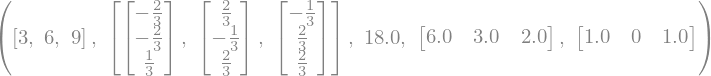

In [3]:
A = Matrix([[5, -2, 0], [-2, 6, 2], [0, 2, 7]])
b = Matrix([[-10, 8, 14]]).transpose()
c = Matrix([6])

quadratic_canonicalization(A, b, c)

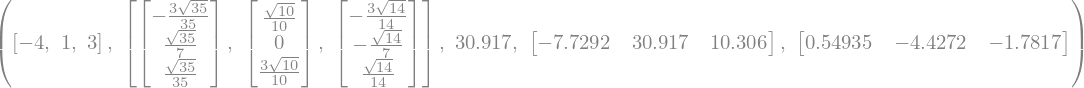

In [4]:
A = Matrix([[1, 3, 0], [3, -2, -1], [0, -1, 1]])
b = Matrix([[8, 2, -12]]).transpose()
c = Matrix([3])

quadratic_canonicalization(A, b, c)

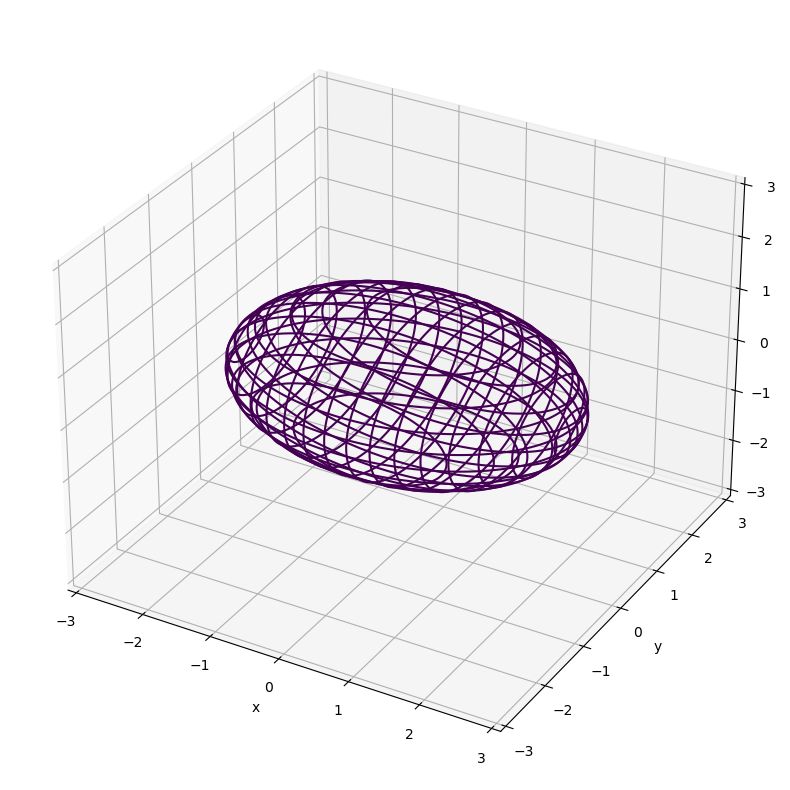

In [5]:
def ellip_part2(x, y, z):
    return x**2/6 + y**2/3 + z**2/2 -1

plot_implicit(ellip_part2, bbox=(-3., 3.))

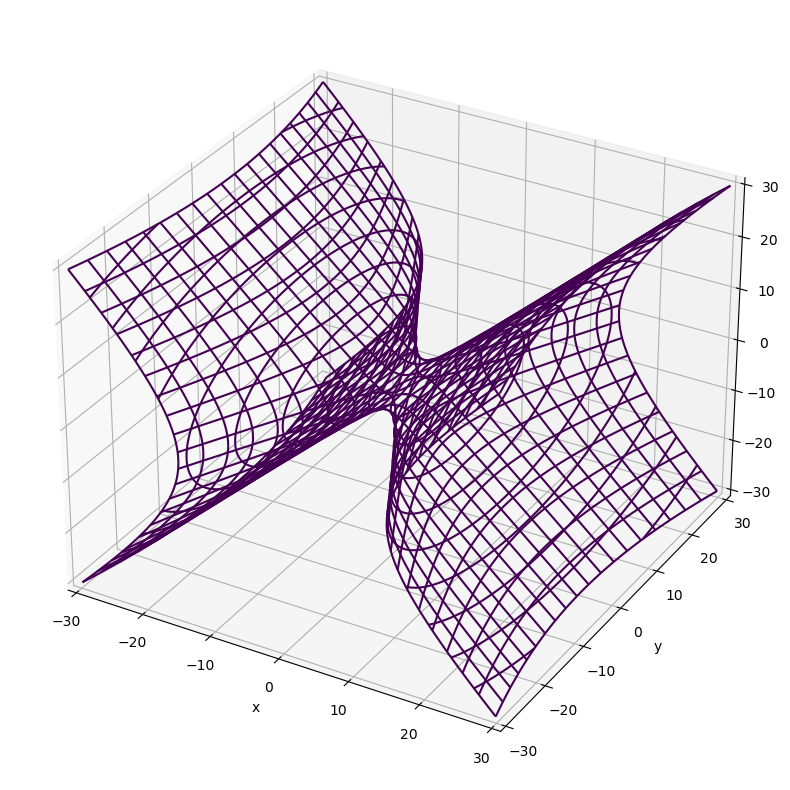

In [6]:
def hyp_part2(x, y, z):
    return -x**2 / 7.7292 + y**2 / 30.917  + z**2 / 10.306 - 1

plot_implicit(hyp_part2, bbox=(-30, 30))